# **Análise obras IFC**

*Importando bibliotecas*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))
!pip install statsmodels=='0.9.0'
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

*Importando os dados*

In [ ]:
df = pd.read_csv("dados.csv", encoding='latin-1')
df.head()

,CAMPUS,prioridades_total,prioridades_IFC,qtd,peso,peso_qtd,prio_qtd,decisao_prio_qtd,decisao_peso_qtd,obra_parada,reforma_seguranca,reforma_regularizacao,reforma_acessibilidade,reforma_novo_uso,obra_nova_seguranca,obra_nova_regularizacao,obra_nova_acessibilidade,obra_nova_novo_uso
0,Abelardo Luz,26.1,2.37,13,4.1,0.32,2.01,1,1,0,2,2,0,1,0,0,1,4
1,Araquari,14.4,1.31,14,4.4,0.31,1.03,1,1,0,1,3,0,2,0,0,1,3
2,Blumenau,20.9,1.90,17,4.9,0.29,1.23,1,1,2,1,1,0,2,1,0,0,0
3,Brusque,6.2,0.56,4,1.2,0.30,1.55,1,1,0,1,0,0,0,0,0,2,0
4,Camboriú,5.1,0.46,16,3.1,0.19,0.32,0,0,0,0,2,0,3,0,0,0,2


##**Análise descritiva** 

**Descrição**:

Análise da prioridade de obra por campus

***Variáveis***

**CAMPUS:** nome do campus

**prioridades_total:** prioridade considerando as prioridades+pesos

**prioridades_IFC:** prioridades_total/qtd de prioridades

**qtd:** quantidade de obras no campus

**peso:** soma dos pesos das obras

**peso_qtd:** peso/qtd de obras

**prio_qtd:** prio/qtd

**decisao_prio_qtd:** decisão de prioridade de alocação de recurso 1 =  acima 1

**decisao_peso_qtd:** decisão de prioridade de alocação de recurso 1 = acima de 0,25

**obra_parada:** qtd de obras paradas por campus

**reforma_seguranca:** qtd de reformas de segurança por campus

**reforma_regulizacao:** qtd de reformas de regulização por campus

**reforma_acessibilidade:** qtd de reformas de acessibilidade uso por campus

**reforma_novo_uso:** qtd de reformas de novo uso por campus

**obra_nova_seguranca:** qtd de obras novas de segurança por campus

**obra_nova_regularização:** qtd de obras novas de regularização por campus

**obra_nova_acessibilidade:** qtd de obras novas de acessibilidade por campus

**obra_nova_novo_uso:** qtd de obras novas de novo uso por campus


In [ ]:
df.head(16)

,CAMPUS,prioridades_total,prioridades_IFC,qtd,peso,peso_qtd,prio_qtd,decisao_prio_qtd,decisao_peso_qtd,obra_parada,reforma_seguranca,reforma_regularizacao,reforma_acessibilidade,reforma_novo_uso,obra_nova_seguranca,obra_nova_regularizacao,obra_nova_acessibilidade,obra_nova_novo_uso
0,Abelardo Luz,26.1,2.37,13,4.1,0.32,2.01,1,1,0,2,2,0,1,0,0,1,4
1,Araquari,14.4,1.31,14,4.4,0.31,1.03,1,1,0,1,3,0,2,0,0,1,3
2,Blumenau,20.9,1.90,17,4.9,0.29,1.23,1,1,2,1,1,0,2,1,0,0,0
3,Brusque,6.2,0.56,4,1.2,0.30,1.55,1,1,0,1,0,0,0,0,0,2,0
4,Camboriú,5.1,0.46,16,3.1,0.19,0.32,0,0,0,0,2,0,3,0,0,0,2
5,Concórdia,5.5,0.50,15,2.5,0.17,0.37,0,0,0,0,2,0,2,0,0,0,1
6,Fraiburgo,2.3,0.21,4,1.3,0.33,0.58,0,0,0,1,0,0,1,0,0,0,0
7,Ibirama,3.9,0.35,6,0.9,0.15,0.65,0,0,0,1,0,0,0,0,0,0,1
8,Luzerna,11.1,1.01,9,2.1,0.23,1.23,1,0,0,0,1,0,2,0,0,1,2
9,Reitoria,6.4,0.58,16,1.4,0.09,0.40,0,0,0,0,1,0,1,0,0,0,2


In [ ]:
df.describe().round(2)

,prioridades_total,prioridades_IFC,qtd,peso,peso_qtd,prio_qtd,decisao_prio_qtd,decisao_peso_qtd,obra_parada,reforma_seguranca,reforma_regularizacao,reforma_acessibilidade,reforma_novo_uso,obra_nova_seguranca,obra_nova_regularizacao,obra_nova_acessibilidade,obra_nova_novo_uso
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,7.98,0.72,10.00,1.92,0.18,0.75,0.38,0.25,0.12,0.56,0.88,0.06,0.88,0.12,0.06,0.31,1.25
std,7.69,0.70,4.89,1.55,0.12,0.64,0.50,0.45,0.50,0.63,0.96,0.25,1.02,0.34,0.25,0.60,1.24
min,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.42,0.31,5.75,0.88,0.10,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5.85,0.53,9.00,1.55,0.18,0.53,0.00,0.00,0.00,0.50,1.00,0.00,0.50,0.00,0.00,0.00,1.00
75%,11.92,1.08,14.25,2.65,0.29,1.23,1.00,0.25,0.00,1.00,1.25,0.00,2.00,0.00,0.00,0.25,2.00
max,26.10,2.37,17.00,4.90,0.33,2.01,1.00,1.00,2.00,2.00,3.00,1.00,3.00,1.00,1.00,2.00,4.00


### Box plot da variável *dependente* (y)


### Avaliando o comportamento da distribuição das variáveis que pretende-se enquandrar como dependente peso_qtd e prio_qtd:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Outliers</li>
    <li>Tendência</li>
</ul>

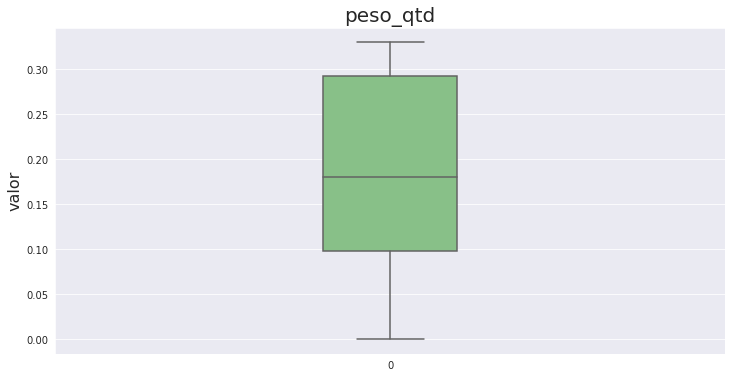

In [ ]:
ax = sns.boxplot(data=df['peso_qtd'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('peso_qtd', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax


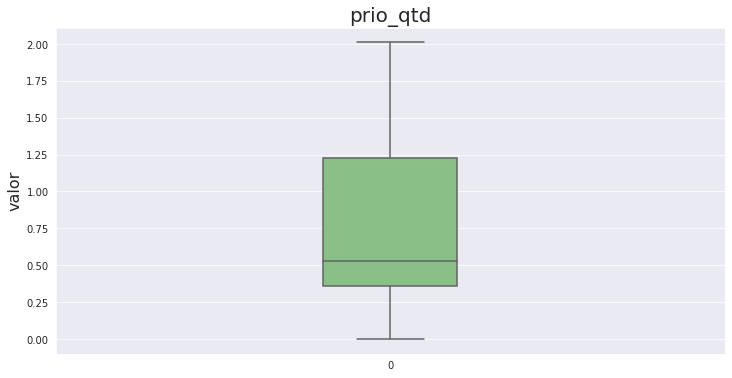

In [ ]:
ax = sns.boxplot(data=df['prio_qtd'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('prio_qtd', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax

### Investigando a variável *dependente* (y) juntamente com outras característica

Box plot da variável dependente (peso_qtd) em conjunto com cada variável explicativa.

### Questionamentos avaliados sobre o comportamento da distribuição da variável dependente com cada variável explicativa:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

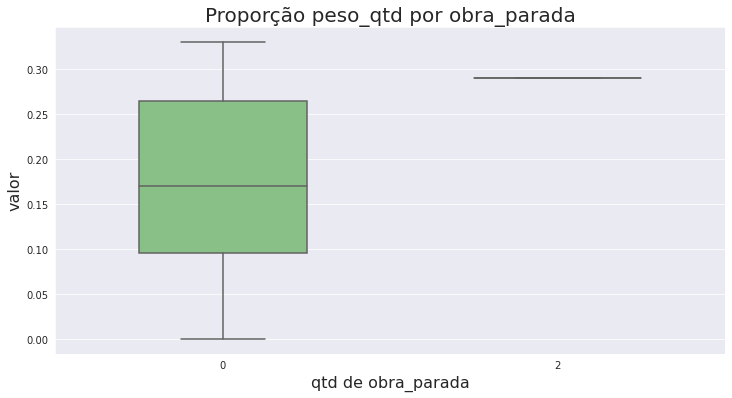

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='obra_parada', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por obra_parada', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de obra_parada', fontsize=16)
ax

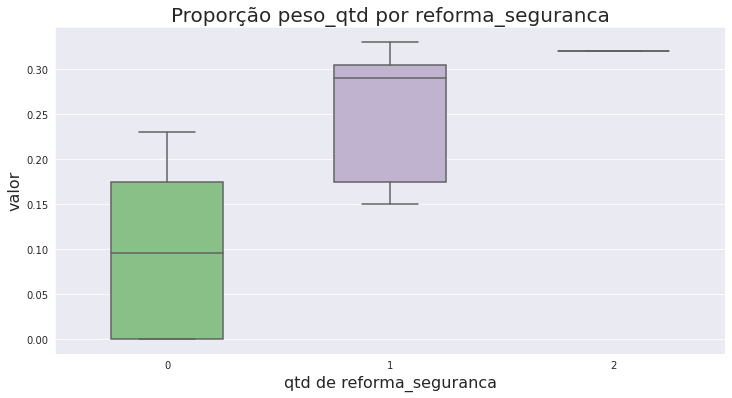

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='reforma_seguranca', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por reforma_seguranca', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de reforma_seguranca', fontsize=16)
ax

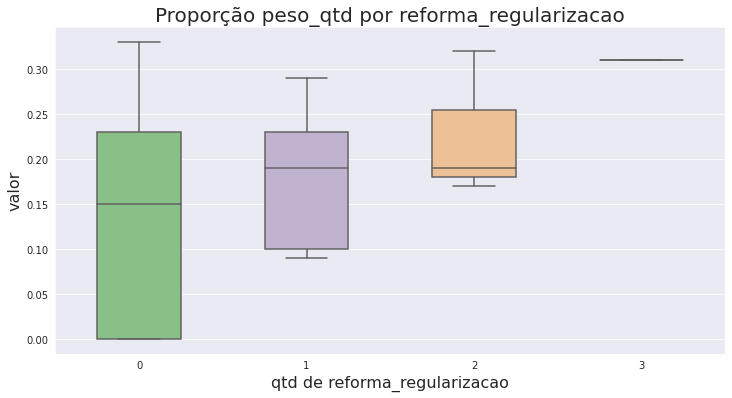

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='reforma_regularizacao', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por reforma_regularizacao', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de reforma_regularizacao', fontsize=16)
ax

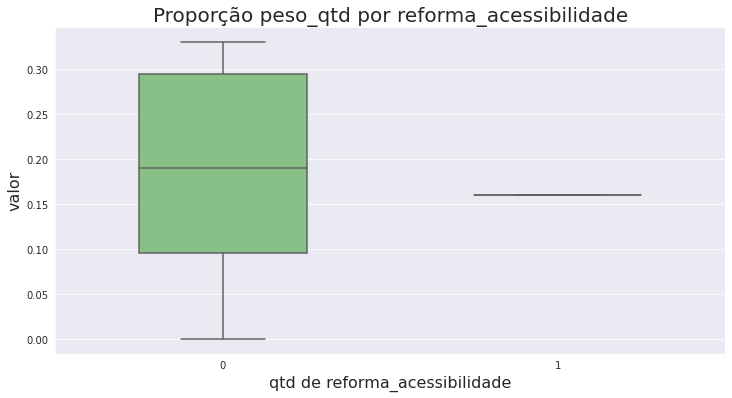

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='reforma_acessibilidade', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por reforma_acessibilidade', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de reforma_acessibilidade', fontsize=16)
ax

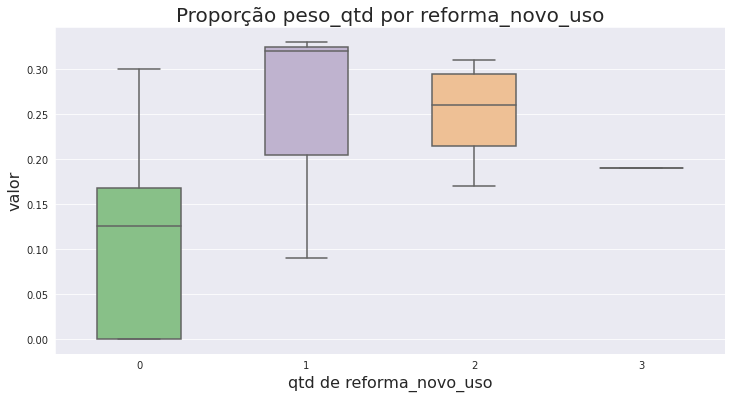

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='reforma_novo_uso', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por reforma_novo_uso', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de reforma_novo_uso', fontsize=16)
ax

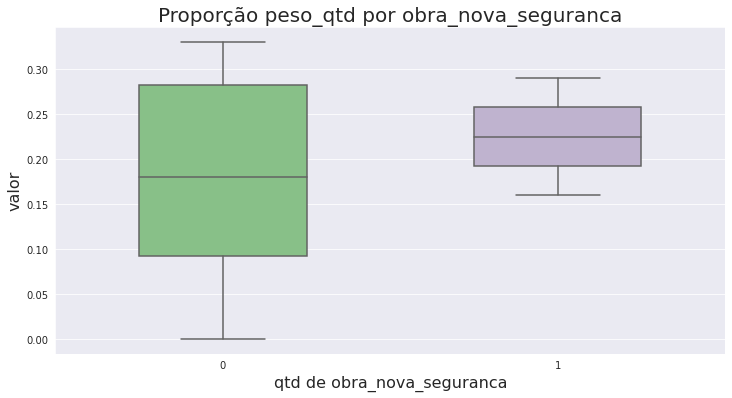

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='obra_nova_seguranca', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por obra_nova_seguranca', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de obra_nova_seguranca', fontsize=16)
ax

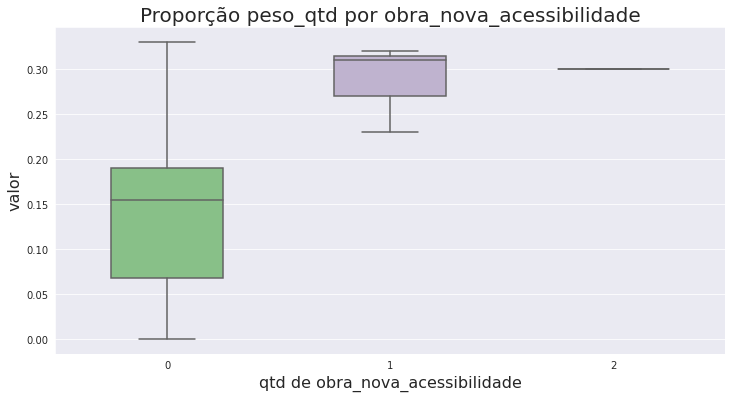

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='obra_nova_acessibilidade', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por obra_nova_acessibilidade', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de obra_nova_acessibilidade', fontsize=16)
ax

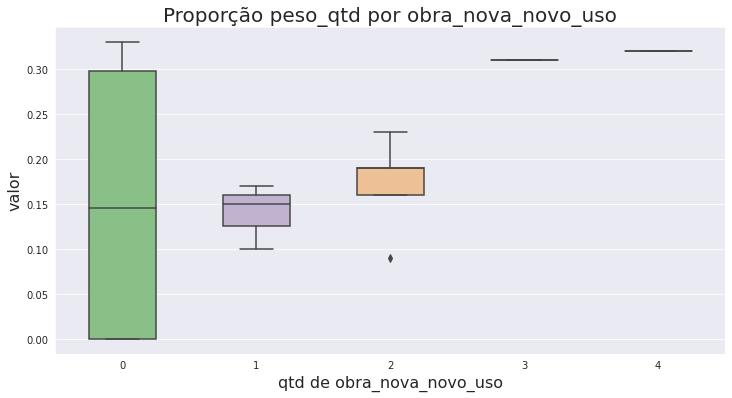

In [ ]:
ax = sns.boxplot(y='peso_qtd', x='obra_nova_novo_uso', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Proporção peso_qtd por obra_nova_novo_uso', fontsize=20)
ax.set_ylabel('valor', fontsize=16)
ax.set_xlabel('qtd de obra_nova_novo_uso', fontsize=16)
ax

### Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (peso_qtd).

### Questionamentos:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


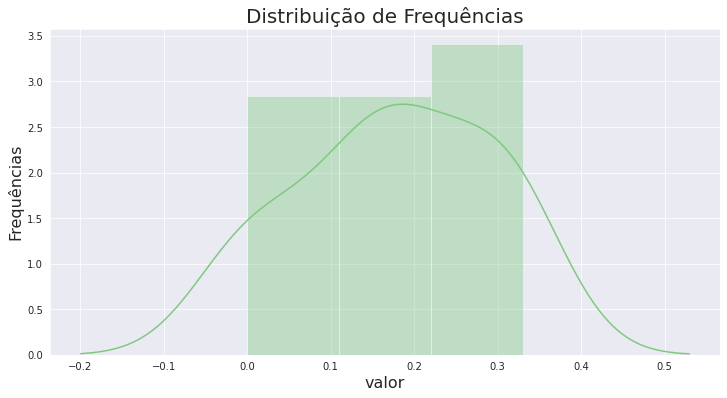

In [ ]:
ax = sns.distplot(df['peso_qtd'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('valor', fontsize=16)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'taxa peso_qtd obra')

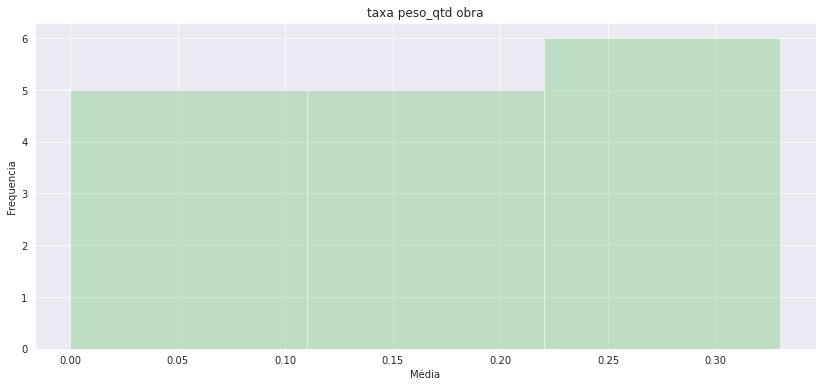

In [ ]:
ax = sns.distplot(df.peso_qtd, norm_hist= False, kde = False)
ax.set(xlabel ="Média", ylabel = 'Frequencia')
ax.set_title('taxa peso_qtd obra')

Text(0.5, 1.0, 'Distribuição dos pesos pela qtd de obra')

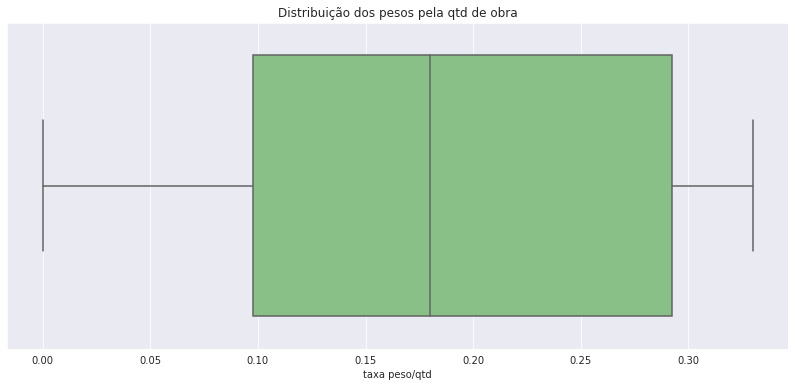

In [ ]:
ax= sns.boxplot(x=df.peso_qtd)
ax.set(xlabel = 'taxa peso/qtd')
ax.set_title('Distribuição dos pesos pela qtd de obra')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Taxa peso por qtd de obras')

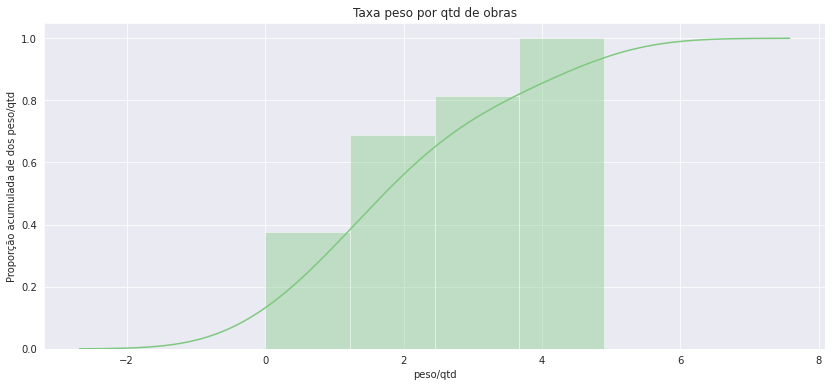

In [ ]:
ax = sns.distplot(df.peso, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='peso/qtd', ylabel='Proporção acumulada de dos peso/qtd')
ax.set_title('Taxa peso por qtd de obras')

### Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Questionamentos:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

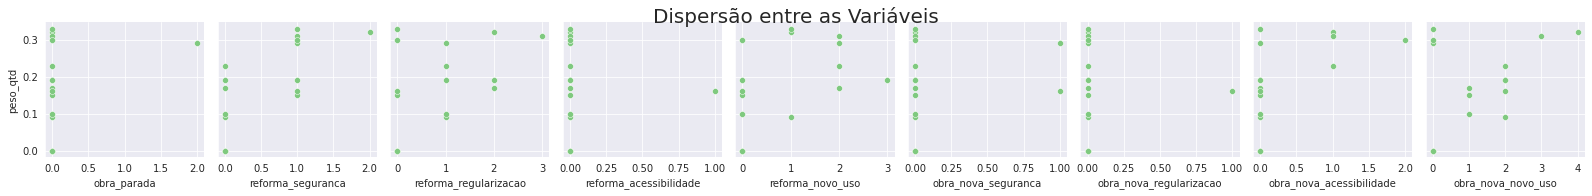

In [ ]:
ax = sns.pairplot(df, y_vars='peso_qtd', x_vars=['obra_parada', 'reforma_seguranca', 'reforma_regularizacao','reforma_acessibilidade','reforma_novo_uso','obra_nova_seguranca','obra_nova_regularizacao','obra_nova_acessibilidade','obra_nova_novo_uso'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

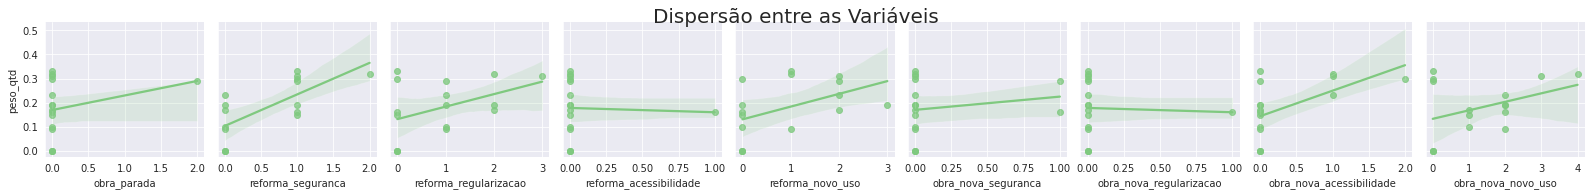

In [ ]:
ax = sns.pairplot(df, y_vars='peso_qtd', x_vars=['obra_parada', 'reforma_seguranca', 'reforma_regularizacao','reforma_acessibilidade','reforma_novo_uso','obra_nova_seguranca','obra_nova_regularizacao','obra_nova_acessibilidade','obra_nova_novo_uso'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

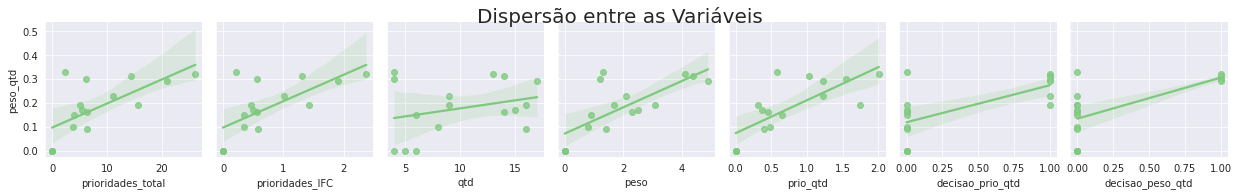

In [ ]:
ax = sns.pairplot(df, y_vars='peso_qtd', x_vars=['prioridades_total',	'prioridades_IFC',	'qtd'	,'peso','prio_qtd','decisao_prio_qtd','decisao_peso_qtd'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
df.peso_qtd.mean()

0.176875

In [ ]:
zconfint(df.peso_qtd)

(0.12013416253610508, 0.23361583746389492)

In [ ]:
df2 = DescrStatsW(df.peso_qtd)
df2.tconfint_mean()

(0.11516966603415399, 0.23858033396584596)

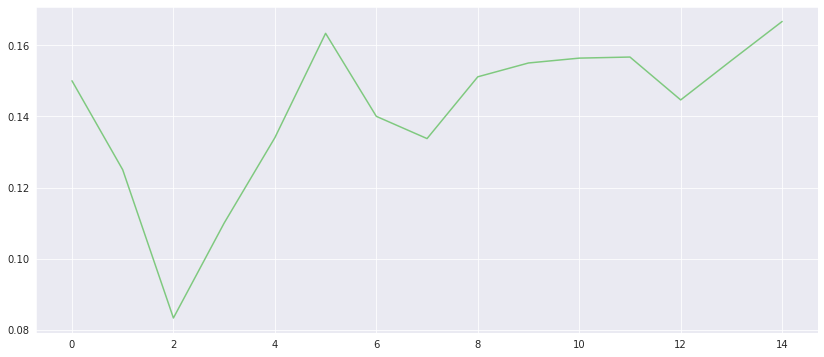

In [ ]:
np.random.seed(75241)
temp = df.sample(frac=1).peso_qtd

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [ ]:
valor = df['peso_qtd']

In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ= Q3-Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b1bc890d0>]],
      dtype=object)

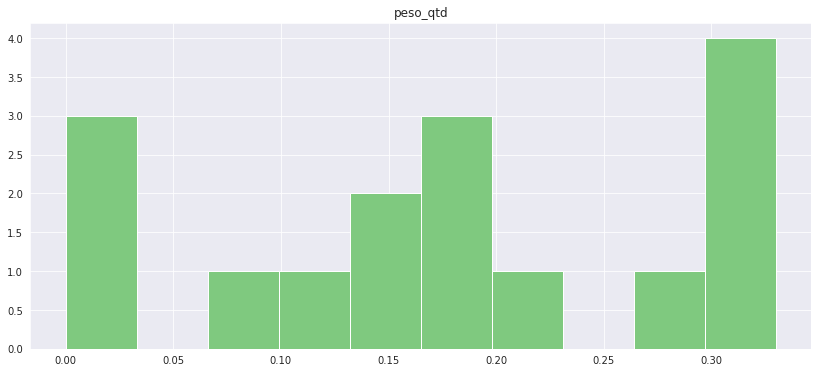

In [ ]:
df.hist(['peso_qtd'])

### **Análise por campus**


In [ ]:
campus = df.groupby('CAMPUS')
campus['prioridades_total',	'prioridades_IFC','peso_qtd','prio_qtd'	].mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,prioridades_total,prioridades_IFC,peso_qtd,prio_qtd
CAMPUS,,,,
Abelardo Luz,26.1,2.37,0.32,2.01
Araquari,14.4,1.31,0.31,1.03
Blumenau,20.9,1.90,0.29,1.23
Brusque,6.2,0.56,0.30,1.55
Camboriú,5.1,0.46,0.19,0.32
Concórdia,5.5,0.50,0.17,0.37
Fraiburgo,2.3,0.21,0.33,0.58
Ibirama,3.9,0.35,0.15,0.65
Luzerna,11.1,1.01,0.23,1.23


In [ ]:
campus['peso_qtd'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
CAMPUS,,,,,,,,
Abelardo Luz,1.0,0.32,NaN,0.32,0.32,0.32,0.32,0.32
Araquari,1.0,0.31,NaN,0.31,0.31,0.31,0.31,0.31
Blumenau,1.0,0.29,NaN,0.29,0.29,0.29,0.29,0.29
Brusque,1.0,0.30,NaN,0.30,0.30,0.30,0.30,0.30
Camboriú,1.0,0.19,NaN,0.19,0.19,0.19,0.19,0.19
Concórdia,1.0,0.17,NaN,0.17,0.17,0.17,0.17,0.17
Fraiburgo,1.0,0.33,NaN,0.33,0.33,0.33,0.33,0.33
Ibirama,1.0,0.15,NaN,0.15,0.15,0.15,0.15,0.15
Luzerna,1.0,0.23,NaN,0.23,0.23,0.23,0.23,0.23


Text(0.5, 1.0, 'Valor taxa de peso por quantidade de obras por campus')

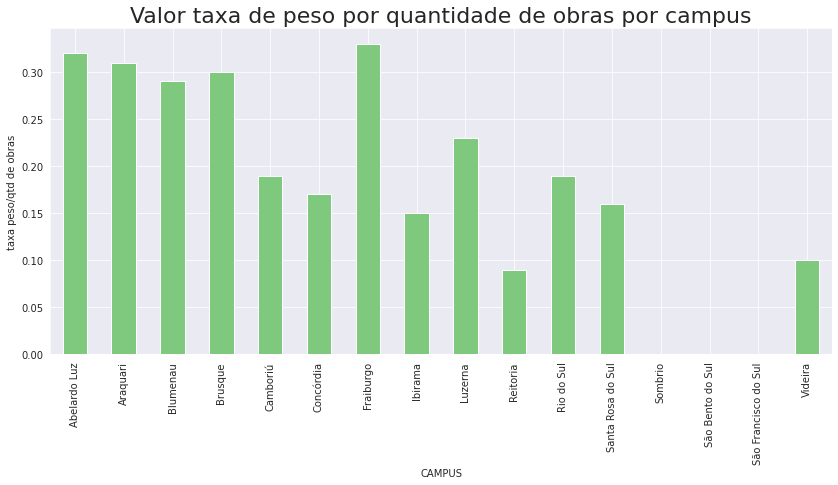

In [ ]:
fig = campus['peso_qtd'].mean().plot.bar()
fig.set_ylabel('taxa peso/qtd de obras')
fig.set_title('Valor taxa de peso por quantidade de obras por campus', {'fontsize': 22})

Text(0.5, 1.0, 'Quantidade de obras por campus')

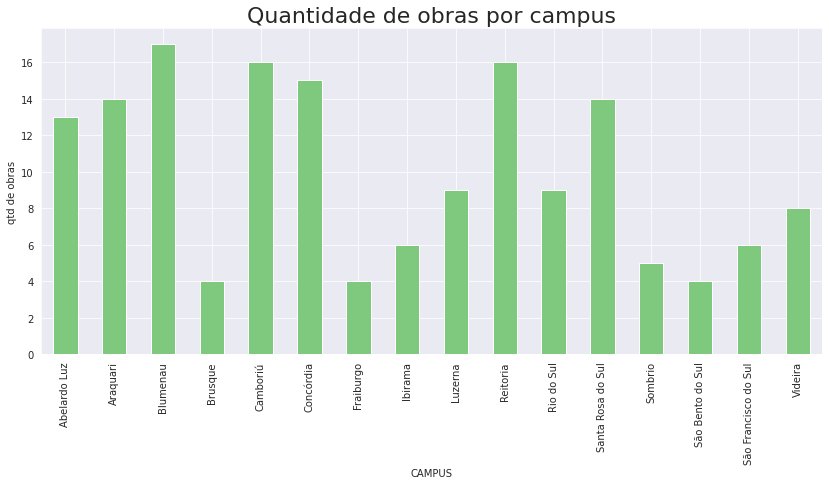

In [ ]:
fig = campus['qtd'].mean().plot.bar()
fig.set_ylabel('qtd de obras')
fig.set_title('Quantidade de obras por campus', {'fontsize': 22})

Text(0.5, 1.0, 'prioridade/qtd por campus')

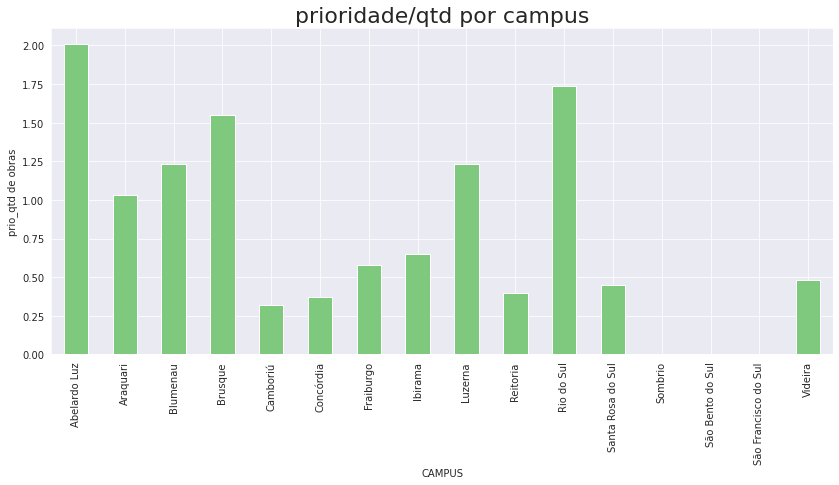

In [ ]:
fig = campus['prio_qtd'].mean().plot.bar()
fig.set_ylabel('prio_qtd de obras')
fig.set_title('prioridade/qtd por campus', {'fontsize': 22})

## **Matriz de correlação**

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>


In [ ]:
df.corr().round(2)

,prioridades_total,prioridades_IFC,qtd,peso,peso_qtd,prio_qtd,decisao_prio_qtd,decisao_peso_qtd,obra_parada,reforma_seguranca,reforma_regularizacao,reforma_acessibilidade,reforma_novo_uso,obra_nova_seguranca,obra_nova_regularizacao,obra_nova_acessibilidade,obra_nova_novo_uso
prioridades_total,1.00,1.00,0.54,0.82,0.67,0.85,0.81,0.69,0.45,0.69,0.57,-0.06,0.36,0.29,-0.06,0.35,0.63
prioridades_IFC,1.00,1.00,0.54,0.82,0.67,0.85,0.81,0.69,0.45,0.69,0.57,-0.06,0.36,0.28,-0.06,0.35,0.63
qtd,0.54,0.54,1.00,0.78,0.28,0.16,0.16,0.24,0.38,0.09,0.70,0.22,0.68,0.44,0.22,-0.14,0.56
peso,0.82,0.82,0.78,1.00,0.73,0.56,0.59,0.66,0.51,0.52,0.75,0.07,0.71,0.42,0.07,0.24,0.58
peso_qtd,0.67,0.67,0.28,0.73,1.00,0.76,0.67,0.66,0.26,0.71,0.43,-0.04,0.47,0.16,-0.04,0.55,0.38
prio_qtd,0.85,0.85,0.16,0.56,0.76,1.00,0.89,0.66,0.20,0.74,0.33,-0.13,0.12,0.05,-0.13,0.63,0.50
decisao_prio_qtd,0.81,0.81,0.16,0.59,0.67,0.89,1.00,0.75,0.33,0.56,0.38,-0.20,0.23,0.10,-0.20,0.69,0.38
decisao_peso_qtd,0.69,0.69,0.24,0.66,0.66,0.66,0.75,1.00,0.45,0.65,0.39,-0.15,0.22,0.22,-0.15,0.68,0.24
obra_parada,0.45,0.45,0.38,0.51,0.26,0.20,0.33,0.45,1.00,0.19,0.03,-0.07,0.29,0.68,-0.07,-0.14,-0.27
reforma_seguranca,0.69,0.69,0.09,0.52,0.71,0.74,0.56,0.65,0.19,1.00,0.12,0.19,-0.09,0.27,0.19,0.38,0.41


## **Modelo de regressão**



fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

**Erro Quadrático Médio**

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

**Raíz do Erro Quadrático Médio**

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

**Coeficiente de Determinação - R²**

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
y = df['peso_qtd']
X = df[['qtd','peso']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2811)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
pd.DataFrame([EQM, REQM], ['EQM', 'REQM'], columns=['Métricas'])

,Métricas
EQM,0.03
REQM,0.17


Estimação:

In [ ]:
qtd= 10
peso= 7

entrada=[[qtd,peso]]

print('{0:.2f}'.format(modelo.predict(entrada)[0]))


0.69
